In [1]:
import cv2

In [2]:
classNames = []
classFile = 'coco.names'
with open(classFile,'rt') as f:
classNames = f.read().rstrip('\n').split('\n')


class names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse' .......]

In [3]:
configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'frozen_inference_graph.pb'

In [4]:
net = cv2.dnn_DetectionModel(weightsPath, configPath)
net.setInputSize(320, 320)
net.setInputScale(1.0 / 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

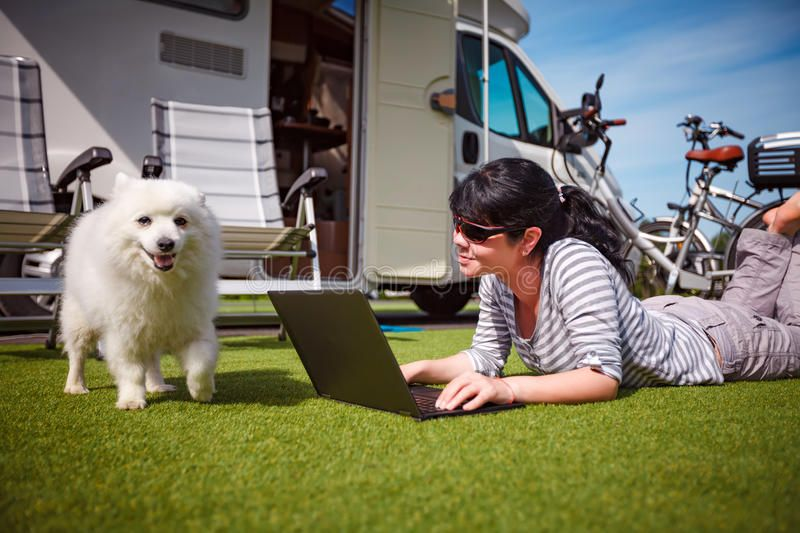

In [5]:
img = cv2.imread("objects.jpg")
cv2.imshow("output",img)

In [6]:
classIds, confs, bbox = net.detect(img, confThreshold=0.5)

classIds = [ 1 18  8  2 73]
bbox = [[397 151 401 266] [ 53 161 171 247] [  9   3 643 336] [449  41 320 275] [252 279 288 141]]

In [7]:
if len(classIds) != 0:
   for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
     cv2.rectangle(img, box, color=(0, 255, 0), thickness=2)
     cv2.putText(img, classNames[classId - 1].upper(), (box[0] + 10, box[1] + 30),cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
     cv2.putText(img, str(round(confidence * 100, 2))+"%", (box[0] + 161, box[1] + 30),cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

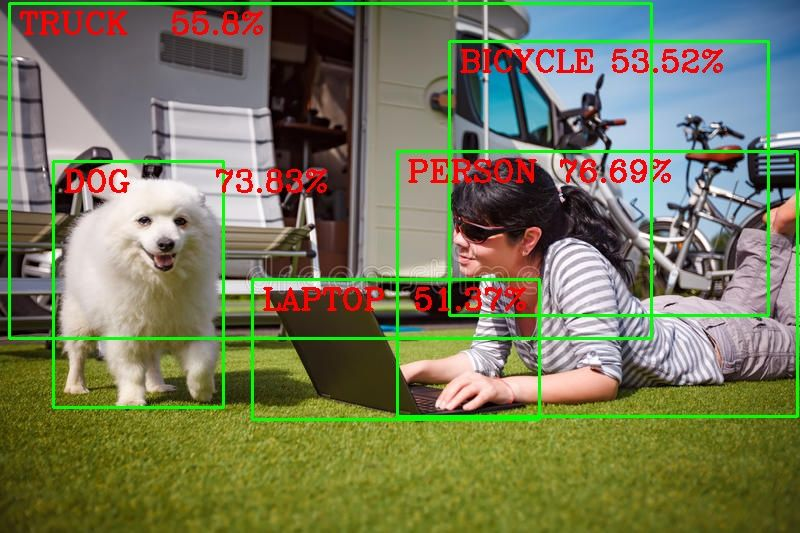

In [8]:
cv2.imshow("Output", img)
cv2.waitKey(0)

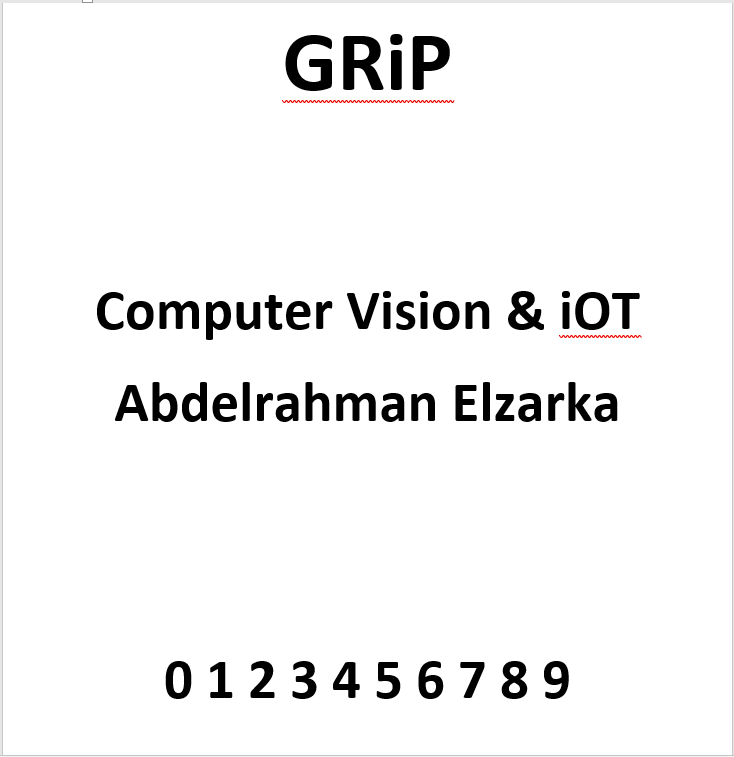

In [26]:
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd= 'C:\Program Files\Tesseract-OCR\tesseract.exe'
img = cv2.imread('letters.png')

In [27]:
print(pytesseract.image_to_string(img))

GRiP

Computer Vision & iOT
Abdelrahman Elzarka

0123456789

In [28]:
boxes= pytesseract.image_to_boxes(img)
himg,wimg,_=img.shape

Certainly	theology	needs	empirical	facts	and	scientific	theoretical	insights.	The	social	scientists	offer	help.	Yet	they	do	not	accomplish	what	I	must	now	attempt.	My	main	question	is	where	and	how	the	church	must	stand	to	be	the	witnessing	church;	that	is,	what	must	be	the	relation	between	the	culture	that	is	the	church	(and	the	larger	Christian	and	biblical	metaculture	the	church	represents)	and	those	cultures	the	church	indwells,	evangelizes,	serves?	Answering	will	Tequire	all	the	resources	that	Christian	theology	can	bring	to	bear,	and	not	a	little	help	from	such	as	Berger	and	Bellah	as	well.	Already	they	have	showed	us,	willy-nilly,	that	theology	is	required	for	the	task:	they	make	such	ample	(and	often	skillful)	use	of	it,	themselves!	

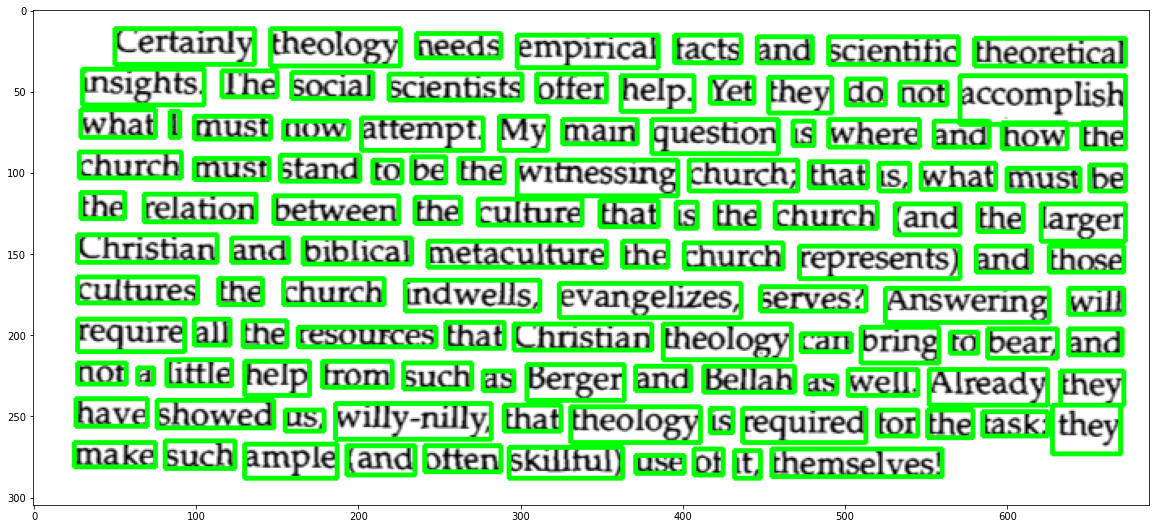

In [24]:
import cv2
import pytesseract as pyt

pyt.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

#img=cv2.imread('pyte_ocr.png')
img=cv2.imread('yv1ZE.png')
boxes=pyt.image_to_data(img,lang='eng')

for x,b in enumerate(boxes.splitlines()) :
    if x!=0 :
        b=b.split()
        if len(b)==12 :
            x,y,w,h =int(b[6]),int(b[7]),int(b[8]),int(b[9])
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            #cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),1)
            print(b[11],end="\t")
plt.figure(figsize=(20,20))
plt.imshow(img)